# Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import re


In [2]:
df = pd.read_csv('fiction_df.csv')

# Best Books Ever list:
We have already cleaned and analysed the data for fiction books, now we will focus on the best ratings of BBE list


Our new list of main genres is the following:
(excluding drama,poetry,humor... and groping some related genres)

In [3]:
grouped_genres = ["fantasy_scifi","childrens","horror_crime_mistery","young_adult","classics","historical","graphic","romance"]

We will asume that the first word of the "genres" column is the main genre of the book. If the first word is "Fiction" we will take the next word, because we already selected only fiction books when we cleaned the data.

In [4]:
df.head(3)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,contemporary,graphic,nonfiction,philosophy,lgbt,feminism,gender,fiction,awards_number,target_genres
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,0,0,0,0,0,0,0,1,41,4
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,0,0,0,0,0,0,0,1,9,6
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,0,0,0,0,0,0,0,1,4,3


Let's take the first significant word

In [5]:

df['main_genre'] = df["genres"].str.lower().str.extract(r'(science|fantasy|childrens|horror|crime|young|crime|mistery|classics|historical|graphic|romance)')

Nan values are genres as drama, poetry and others wich aren't the main fiction genres that we find in novels, so we can drop it

In [6]:
df["main_genre"].isna().sum()

6130

In [7]:
df = df.dropna(subset=['main_genre'])
df = df.dropna(subset=['likedPercent'])

In [8]:
df["main_genre"].shape

(33963,)

In [9]:
grouped_genres

['fantasy_scifi',
 'childrens',
 'horror_crime_mistery',
 'young_adult',
 'classics',
 'historical',
 'graphic',
 'romance']

Let's group the genres, we will loose some information but we will reduce the number of categorical variables

In [10]:
df.loc[df["main_genre"] == "fantasy",'main_genre']='fantasy_scifi'
df.loc[df["main_genre"] == "science",'main_genre']='fantasy_scifi'
df.loc[df["main_genre"] == "childrens",'main_genre']='childrens'
df.loc[df["main_genre"] == "horror",'main_genre']='horror_crime_mistery'
df.loc[df["main_genre"] == "crime",'main_genre']='horror_crime_mistery'
df.loc[df["main_genre"] == "mistery",'main_genre']='horror_crime_mistery'
df.loc[df["main_genre"] == "young",'main_genre']='young_adult'
df.loc[df["main_genre"] == "classics",'main_genre']='classics'
df.loc[df["main_genre"] == "historical",'main_genre']='historical'
df.loc[df["main_genre"] == "graphic",'main_genre']='graphic'
df.loc[df["gender"] == 1,'gender_lgbt']= 1
df.loc[df["feminism"] == 1,'gender_lgbt']= 1
df.loc[df["lgbt"] == 1,'gender_lgbt']= 1
df['gender_lgbt'] = df['gender_lgbt'].fillna(0)
df["gender_lgbt"] = df["gender_lgbt"].astype(int)
    

df.dropna(axis='columns')

Let's check again the NaN values (we already discuss in the previous analysis that we can drop the following columns)

In [11]:
df.isna().sum()
df = df.dropna(axis='columns')


In [12]:
df.columns

Index(['bookId', 'title', 'author', 'rating', 'isbn', 'genres', 'characters',
       'pages', 'awards', 'numRatings', 'ratingsByStars', 'likedPercent',
       'setting', 'bbeScore', 'bbeVotes', 'fantasy', 'adventure', 'sci_fi',
       'crime_and_thriller', 'horror_and_mistery', 'romantic', 'humor',
       'poetry', 'classics', 'drama', 'young_adult', 'childrens', 'historical',
       'contemporary', 'graphic', 'nonfiction', 'philosophy', 'lgbt',
       'feminism', 'gender', 'fiction', 'awards_number', 'target_genres',
       'main_genre', 'gender_lgbt'],
      dtype='object')

In [13]:
df = df.drop(["isbn","genres","characters","setting","ratingsByStars","fantasy","adventure","sci_fi","crime_and_thriller","horror_and_mistery","romantic","humor","poetry","classics","drama","young_adult","childrens","historical","contemporary","graphic","nonfiction","philosophy","lgbt","feminism","gender","fiction","target_genres","awards","graphic" ],axis=1)

In [14]:
df

,bookId,title,author,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,awards_number,main_genre,gender_lgbt
0,2767052-the-hunger-games,The Hunger Games,Suzanne Collins,4.33,374.0,6376780,96.0,2993816,30516,41,young_adult,0
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,870.0,2507623,98.0,2632233,26923,9,fantasy_scifi,0
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,324.0,4501075,95.0,2269402,23328,4,classics,0
3,1885.Pride_and_Prejudice,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,279.0,2998241,94.0,1983116,20452,0,classics,0
4,41865.Twilight,Twilight,Stephenie Meyer,3.60,501.0,4964519,78.0,1459448,14874,25,young_adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...
40090,11115191-attracted-to-fire,Attracted to Fire,DiAnn Mills (Goodreads Author),4.14,416.0,2143,95.0,0,1,1,romance,0
40091,12464361-elemental,Elemental,Kim Richardson (Goodreads Author),4.07,151.0,1947,94.0,0,1,0,fantasy_scifi,0
40092,10815662-marked,Marked,Kim Richardson (Goodreads Author),3.70,280.0,6674,84.0,0,1,1,fantasy_scifi,0
40093,11330278-wayward-son,Wayward Son,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,507.0,238,90.0,0,1,0,historical,0


In [15]:
dummies = pd.get_dummies(df["main_genre"])

In [16]:
dfc = pd.concat([df,dummies],axis=1)

Lets take the 1000 best bbeScore

In [17]:
a = dfc.nlargest(1000,"bbeScore")
a
corrM = a.corr()
corrM

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,awards_number,gender_lgbt,childrens,classics,fantasy_scifi,graphic,historical,horror_crime_mistery,romance,young_adult
rating,1.000000,0.299623,0.064192,0.867374,0.087877,0.084910,0.057224,0.004321,0.134424,-0.247038,0.248307,0.128872,0.082769,-0.034709,-0.011274,-0.102948
pages,0.299623,1.000000,-0.040963,0.149978,0.029462,0.027463,-0.019454,-0.054361,-0.195827,-0.075122,0.111811,0.018968,0.115503,0.046725,-0.038176,-0.062387
numRatings,0.064192,-0.040963,1.000000,-0.001019,0.696641,0.700334,0.455923,-0.024751,-0.020329,-0.033174,0.026583,-0.023485,-0.027003,-0.002213,-0.015422,0.062151
likedPercent,0.867374,0.149978,-0.001019,1.000000,0.020009,0.018513,0.016328,0.000885,0.079158,-0.197749,0.229758,0.089962,0.098648,0.017940,-0.043016,-0.143550
bbeScore,0.087877,0.029462,0.696641,0.020009,1.000000,0.999538,0.273771,0.010175,0.029179,0.105971,-0.035093,-0.016438,-0.004206,-0.067887,-0.063408,-0.010551
bbeVotes,0.084910,0.027463,0.700334,0.018513,0.999538,1.000000,0.270233,0.010059,0.033041,0.115321,-0.039509,-0.016370,-0.005114,-0.069097,-0.066588,-0.015503
awards_number,0.057224,-0.019454,0.455923,0.016328,0.273771,0.270233,1.000000,0.046034,0.007925,-0.300556,0.098504,0.005733,0.087623,-0.017040,-0.078774,0.265737
gender_lgbt,0.004321,-0.054361,-0.024751,0.000885,0.010175,0.010059,0.046034,1.000000,-0.030652,0.032199,-0.043852,0.056874,0.059164,-0.052647,-0.025936,0.016768
childrens,0.134424,-0.195827,-0.020329,0.079158,0.029179,0.033041,0.007925,-0.030652,1.000000,-0.114923,-0.093826,-0.012694,-0.056851,-0.045849,-0.042365,-0.067283
classics,-0.247038,-0.075122,-0.033174,-0.197749,0.105971,0.115321,-0.300556,0.032199,-0.114923,1.000000,-0.403941,-0.054649,-0.244754,-0.197389,-0.182390,-0.289669


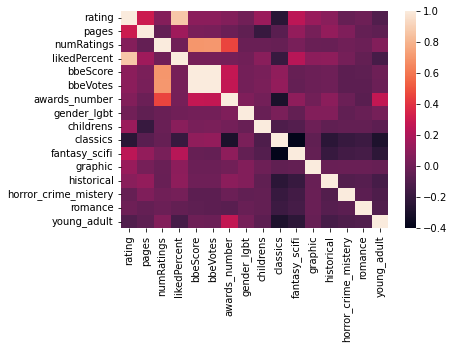

In [18]:
ax = sns.heatmap(corrM) #vmin=0, vmax=1)

Something interesting, we can see a correlation between young adults novels and number of awards / classics have a negatibe correlation. We will see it on Tableau

Let's check the 100 best scores

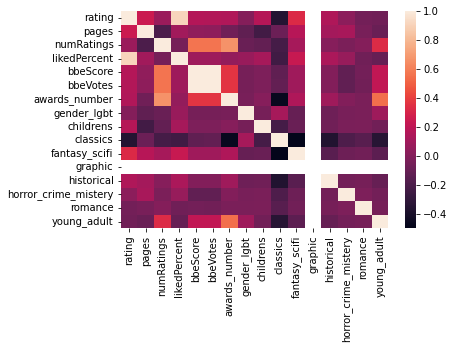

In [20]:
b = dfc.nlargest(100,"bbeScore")
b
corrMb = b.corr()
corrM
ax = sns.heatmap(corrMb) #vmin=0, vmax=1)

We can see a higher correlation! We also see an interesting corelation between young adult novels and lgbt, feminist and gender topics. I don't think any target variable can be predicted. Regarding the representation of the topics in our analysis, although we have similar percentages of representation in all genders (between 3 and 6%) it may be interesting to see if the representation is higher when we get closer to the top positions of the ranking. For this we will use MySQL and Tableau

In [21]:

compression_opts = dict(method='zip',
                        archive_name='bbe_clean.csv') 
dfc.to_csv('out.zip', index=False,
          compression=compression_opts) 